In [ ]:
# Install the opendatasets package
!pip install opendatasets

# Import necessary libraries
import opendatasets as od  # For downloading datasets
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
from IPython.display import display  # For displaying objects in Jupyter notebooks
import cv2  # For image processing
import os  # For interacting with the operating system
import seaborn as sns  # For statistical data visualization
from PIL import Image  # For opening and manipulating images
import PIL  # Pillow library for image processing

# Import necessary Keras modules for building and training neural networks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, Dense, Flatten, Input, Lambda
import tensorflow as tf  # TensorFlow for deep learning
from keras import backend as K  # Keras backend for low-level operations

# For image data augmentation
from keras.preprocessing.image import ImageDataGenerator
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
tf.random.set_seed(1)

# Define image dimensions and number of classes
h, w, c = 32, 32, 3
num_classes = 28

# Enable inline plotting in Jupyter notebooks
%matplotlib inline

#Download Dataset


In [ ]:
od.download('https://datasets/mloey1/ahcd1/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alolaa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mloey1/ahcd1


100%|██████████| 24.0M/24.0M [00:02<00:00, 10.8MB/s]


# Preprocessing

In [ ]:
def create_label(df):
    """
    Create a list of formatted labels based on the DataFrame index and the 'label' column values.

    Args:
        df (pd.DataFrame): DataFrame containing the data with a 'label' column.

    Returns:
        list: A list of strings formatted as 'id_<index>_label_<label_value>'.
    """
    res = []  # Initialize an empty list to store the formatted labels
    for i in range(len(df)):  # Iterate over the DataFrame rows
        label_str = "id_{}_label_{}".format(i, df.iloc[i]["label"])  # Format the label string
        res.append(label_str)  # Append the formatted label to the list
    return res  # Return the list of formatted labels

In [ ]:
# Load the training Label data from a CSV file into a DataFrame
train_df = pd.read_csv(
    "/content/ahcd1/csvTrainLabel 13440x1.csv",  # Specify the path to the training CSV file
    header=None,  # Indicate that the CSV file has no header row
    names=["label"],  # Define column names with a single column named 'label'
    converters={'label': str}  # Convert the 'label' column to string type
)

# Load the testing Label data from a CSV file into a DataFrame
test_df = pd.read_csv(
    "/content/ahcd1/csvTestLabel 3360x1.csv",  # Specify the path to the testing CSV file
    header=None,  # Indicate that the CSV file has no header row
    names=["label"],  # Define column names with a single column named 'label'
    converters={'label': str}  # Convert the 'label' column to string type
)

# Apply the create_label function to the training DataFrame to create an 'id' column
train_df["id"] = create_label(train_df)

# Apply the create_label function to the testing DataFrame to create an 'id' column
test_df["id"] = create_label(test_df)

# Display the first few rows of the training DataFrame to verify the changes
train_df.head()


,label,id
0,1,id_0_label_1
1,1,id_1_label_1
2,1,id_2_label_1
3,1,id_3_label_1
4,1,id_4_label_1


In [ ]:
# print the shape of the train df
train_df.shape

(13440, 2)

In [ ]:
# print the shape of the test df
test_df.shape

(3360, 2)

In [ ]:
# Get unique classes from the 'label' column of the training DataFrame
classes = np.unique(train_df["label"].values)

# Determine the number of unique classes
num_classes = len(classes)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '3',
       '4', '5', '6', '7', '8', '9'], dtype=object)

# create carecter dictionary

In [ ]:
# List of characters in Arabic
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]

# Create a dictionary mapping indices to characters
characters_dict = dict(zip(np.arange(0, len(characters)), characters))


{0: 'ا',
 1: 'ب',
 2: 'ت',
 3: 'ث',
 4: 'ج',
 5: 'ح',
 6: 'خ',
 7: 'د',
 8: 'ذ',
 9: 'ر',
 10: 'ز',
 11: 'س',
 12: 'ش',
 13: 'ص',
 14: 'ض',
 15: 'ط',
 16: 'ظ',
 17: 'ع',
 18: 'غ',
 19: 'ف',
 20: 'ق',
 21: 'ك',
 22: 'ل',
 23: 'م',
 24: 'ن',
 25: 'ه',
 26: 'و',
 27: 'ي'}

# check balancing


<ipython-input-11-c8b94ce7f6ea>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(characters);


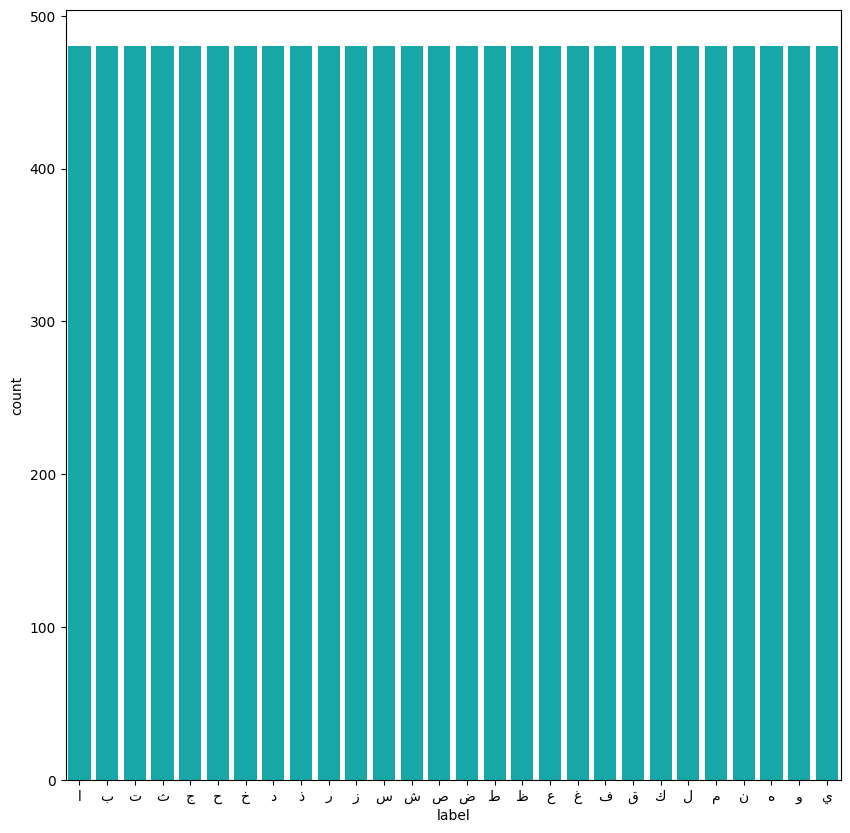

In [ ]:

# Create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Create a countplot of 'label' column from train_df
g = sns.countplot(data=train_df, x="label", color="c")

# Set the x-axis tick labels to Arabic characters
g.set_xticklabels(characters);


In [ ]:
# Define the directory paths for training and testing images
TRAIN_DIRECTORY = "./train_images/"
TEST_DIRECTORY = "./test_images/"
# Create the directory for training images if it doesn't exist
os.makedirs(TRAIN_DIRECTORY, exist_ok=True)

# Create the directory for testing images if it doesn't exist
os.makedirs(TEST_DIRECTORY, exist_ok=True)

In [ ]:
# Add a new column 'id_ext' to the training DataFrame by appending '.png' to each 'id'
train_df["id_ext"] = train_df["id"].apply(lambda x: x + ".png")

# Add a new column 'id_ext' to the testing DataFrame by appending '.png' to each 'id'
test_df["id_ext"] = test_df["id"].apply(lambda x: x + ".png")

In [ ]:
train_df

,label,id,id_ext
0,1,id_0_label_1,id_0_label_1.png
1,1,id_1_label_1,id_1_label_1.png
2,1,id_2_label_1,id_2_label_1.png
3,1,id_3_label_1,id_3_label_1.png
4,1,id_4_label_1,id_4_label_1.png
...,...,...,...
13435,28,id_13435_label_28,id_13435_label_28.png
13436,28,id_13436_label_28,id_13436_label_28.png
13437,28,id_13437_label_28,id_13437_label_28.png
13438,28,id_13438_label_28,id_13438_label_28.png


In [ ]:
test_df

,label,id,id_ext
0,1,id_0_label_1,id_0_label_1.png
1,1,id_1_label_1,id_1_label_1.png
2,2,id_2_label_2,id_2_label_2.png
3,2,id_3_label_2,id_3_label_2.png
4,3,id_4_label_3,id_4_label_3.png
...,...,...,...
3355,26,id_3355_label_26,id_3355_label_26.png
3356,27,id_3356_label_27,id_3356_label_27.png
3357,27,id_3357_label_27,id_3357_label_27.png
3358,28,id_3358_label_28,id_3358_label_28.png


In [ ]:
# Load the training image data from a CSV file into a DataFrame
train_data_x_df = pd.read_csv(
    "/content/ahcd1/csvTrainImages 13440x1024.csv",  # Path to the training image data CSV file
    header=None  # Indicate that there is no header row in the CSV file
)
train_data_x_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Load the testing image data from a CSV file into a DataFrame
test_data_x_df = pd.read_csv(
    "/content/ahcd1/csvTestImages 3360x1024.csv",  # Path to the testing image data CSV file
    header=None  # Indicate that there is no header row in the CSV file
)
test_data_x_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Define the shape of the images
image_shape = (32, 32)

In [ ]:
def create_image(x_data_df, y_data_df, sub_directory):
    """
    Create images from the data and save them to a specified sub-directory.

    Args:
        x_data_df (pd.DataFrame): DataFrame containing image data.
        y_data_df (pd.DataFrame): DataFrame containing image labels and extensions.
        sub_directory (str): Path to the directory where images will be saved.

    Returns:
        None
    """
    for i in range(len(y_data_df)):  # Iterate over each row in the DataFrame
        # Convert the image data to numpy array, reshape, and adjust pixel values
        img = (255 - x_data_df.iloc[i].to_numpy().reshape(image_shape)).T

        # Save the image to the specified sub-directory with the corresponding filename
        plt.imsave(sub_directory + y_data_df.iloc[i]["id_ext"], img, cmap='binary')

In [ ]:
create_image(train_data_x_df, train_df, TRAIN_DIRECTORY)

In [ ]:
create_image(test_data_x_df, test_df, TEST_DIRECTORY)

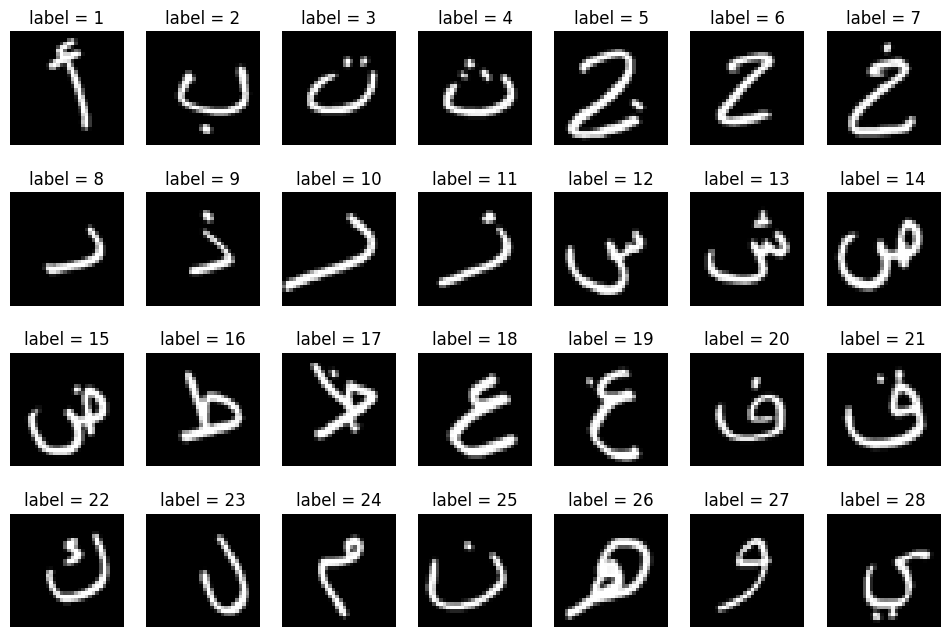

In [ ]:
# Create a dictionary to store the first index of each unique label in the training data
img_key_value = {}
for value in train_df['label'].unique():
    img_key_value[value] = train_df[train_df['label']==value].index[0]

# Extract index and label lists from the dictionary
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

# Create a figure with subplots for displaying example images
fig, ax = plt.subplots(4, 7, figsize=(12, 8))

# Initialize a counter for iterating through img_label
i = 0
for row in range(4):  # Iterate through each row of subplots
    for col in range(7):  # Iterate through each column of subplots
        plt.sca(ax[row, col])  # Set the current subplot
        plt.title(f'label = {img_label[i]}')  # Set the title of the subplot with the corresponding label
        img = plt.imread(TRAIN_DIRECTORY + train_df.iloc[img_index[i]]["id_ext"])  # Load the image from file
        plt.imshow(img)  # Display the image
        plt.axis('off')  # Turn off axis labels
        i += 1  # Move to the next label index

# Adjust layout to prevent overlap of subplots
plt.tight_layout()


In [ ]:
def read_img(root_dir, img):
    """
    Read an image from the specified root directory and return it as a NumPy array.

    Args:
        root_dir (str): Root directory path where the image is located.
        img (str): Image file name or path relative to root_dir.

    Returns:
        np.ndarray: Image data as a NumPy array (in BGR format by default).
    """
    img_path = "{}{}".format(root_dir, img)  # Construct the full path to the image file
    img = cv2.imread(img_path)  # Read the image using OpenCV
    return img  # Return the loaded image as a NumPy array

In [ ]:
test_df.head()

,label,id,id_ext
0,1,id_0_label_1,id_0_label_1.png
1,1,id_1_label_1,id_1_label_1.png
2,2,id_2_label_2,id_2_label_2.png
3,2,id_3_label_2,id_3_label_2.png
4,3,id_4_label_3,id_4_label_3.png


In [ ]:
train_df.head()

,label,id,id_ext
0,1,id_0_label_1,id_0_label_1.png
1,1,id_1_label_1,id_1_label_1.png
2,1,id_2_label_1,id_2_label_1.png
3,1,id_3_label_1,id_3_label_1.png
4,1,id_4_label_1,id_4_label_1.png


32 32 3


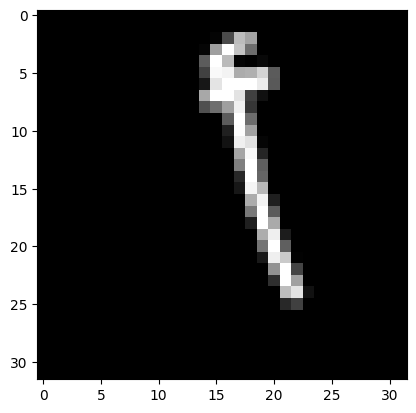

In [ ]:
# Construct the full image path using TEST_DIRECTORY and the 'id_ext' of the first row in test_df
img_path = "{}{}.png".format(TEST_DIRECTORY, str(test_df.iloc[0]["id"]))

# Read the image using OpenCV
img = cv2.imread(img_path)

# Display the image using matplotlib
plt.imshow(img)

# Get and print the dimensions (height, width, channels) of the loaded image
h, w, c = img.shape
print(h, w, c)

#Modeling

In [ ]:
def create_model(optimizer='adam', activation='relu', kernel_initializer='he_normal'):
    """
    Create and compile a convolutional neural network model for image classification.

    Args:
        optimizer (str): Optimizer algorithm to use during model compilation (default is 'adam').
        activation (str): Activation function to use in convolutional and dense layers (default is 'relu').
        kernel_initializer (str): Initialization method for kernel weights (default is 'he_normal').

    Returns:
        keras.models.Sequential: Compiled convolutional neural network model.
    """
    model = Sequential()  # Initialize a Sequential model

    # Input layer with shape (h, w, c) representing image height, width, and channels
    model.add(Input((h, w, c)))

    # Convert RGB image to grayscale
    model.add(Lambda(lambda x: tf.image.rgb_to_grayscale(x)))

    # First convolutional layer with 64 filters, kernel size (5,5), same padding, and specified activation function
    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations

    # Second convolutional layer with 64 filters, kernel size (5,5), same padding, and specified activation function
    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations

    # Max pooling layer with pool size (2,2) to downsample the spatial dimensions
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Dropout layer with 25% dropout rate to prevent overfitting (commented out)
    # model.add(Dropout(0.25))

    # Third convolutional layer with 64 filters, kernel size (3,3), same padding, and specified activation function
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations

    # Fourth convolutional layer with 64 filters, kernel size (3,3), same padding, and specified activation function
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations

    # Max pooling layer with pool size (2,2) and stride (2,2) to downsample the spatial dimensions further
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    # Dropout layer with 25% dropout rate to prevent overfitting (commented out)
    # model.add(Dropout(0.25))

    # Fifth convolutional layer with 64 filters, kernel size (3,3), same padding, and specified activation function
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations
    # Dropout layer with 25% dropout rate to prevent overfitting (commented out)
    # model.add(Dropout(0.25))

    # Flatten layer to convert 2D feature maps into a 1D feature vector
    model.add(Flatten())

    # Fully connected dense layer with 256 neurons and specified activation function
    model.add(Dense(256, activation=activation, kernel_initializer=kernel_initializer))
    model.add(BatchNormalization())  # Batch normalization to normalize activations
    model.add(Dropout(0.25))  # Dropout layer with 25% dropout rate to prevent overfitting

    # Output layer with num_classes neurons for multi-class classification using softmax activation
    model.add(Dense(num_classes, activation="softmax"))

    # Compile the model with sparse categorical crossentropy loss, accuracy metric, and specified optimizer
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    return model  # Return the compiled convolutional neural network model


In [ ]:
model = create_model(optimizer=tf.keras.optimizers.Adam(), activation='relu')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 32, 32, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)       

In [ ]:
# # Generate the model summary INto PNG
# model_summary = []
# model.summary(print_fn=lambda x: model_summary.append(x))
# summary_str = "\n".join(model_summary)

# # Calculate the figure size based on the length of the summary
# line_height = 0.5
# lines = summary_str.split('\n')
# num_lines = len(lines)
# fig_height = line_height * num_lines

# # Create a matplotlib figure with the calculated height
# plt.figure(figsize=(10, fig_height))
# plt.text(0.01, 1, summary_str, fontsize=12, fontfamily='monospace', va='top', ha='left')
# plt.axis('off')

# # Save the figure to a BytesIO object
# buf = io.BytesIO()
# plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1)
# buf.seek(0)

# # Save the BytesIO object to a PNG file
# with open('model_summary.png', 'wb') as f:
#     f.write(buf.getvalue())

# # Close the buffer and the plot
# buf.close()
# plt.close()

In [ ]:
# File path to save the best model weights during training
model_weights_file_path = "best_model_weights.hdf5"

# Number of epochs for training the model
num_epochs = 100

# Batch size used during training
batch_size = 20

# Ratio of validation data split from the training data
validation_ratio = 0.1


In [ ]:
class Generators:
    def __init__(self, train_df, test_df):
        """
        Initialize Generators object with training, validation, and test data generators.

        Args:
            train_df (pd.DataFrame): DataFrame containing training data.
            test_df (pd.DataFrame): DataFrame containing test data.

        Attributes:
            batch_size (int): Batch size for training, validation, and test generators.
            img_size (tuple): Image size (height, width) for training, validation, and test generators.
            train_generator (DirectoryIterator): Training data generator.
            val_generator (DirectoryIterator): Validation data generator.
            test_generator (DirectoryIterator): Test data generator.
        """
        self.batch_size = batch_size  # Set batch size for generators
        self.img_size = (h, w)  # Set image size for generators

        # Split train_df into training and validation sets using train_test_split
        train_df, val_df = train_test_split(train_df, test_size=validation_ratio, random_state=1, stratify=train_df["label"])

        # Define data augmentations and generator for training data
        _train_datagen = ImageDataGenerator(
            rescale=1/255,
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1,
            fill_mode='nearest'
        )
        self.train_generator = _train_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=TRAIN_DIRECTORY,
            x_col="id_ext",
            y_col="label",
            class_mode='sparse',
            batch_size=self.batch_size,
            shuffle=True,
            seed=1,
            target_size=self.img_size
        )
        print('Train generator created')

        # Define data augmentations and generator for validation data
        _val_datagen = ImageDataGenerator(
            rescale=1/255,
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1,
            fill_mode='nearest'
        )
        self.val_generator = _val_datagen.flow_from_dataframe(
            dataframe=val_df,
            directory=TRAIN_DIRECTORY,
            x_col="id_ext",
            y_col='label',
            class_mode='sparse',
            batch_size=self.batch_size,
            shuffle=False,
            seed=1,
            target_size=self.img_size
        )
        print('Validation generator created')

        # Define generator for test data
        _test_datagen = ImageDataGenerator(rescale=1/255)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=TEST_DIRECTORY,
            x_col="id_ext",
            y_col='label',
            class_mode='sparse',
            batch_size=self.batch_size,
            shuffle=False,
            seed=1,
            target_size=self.img_size
        )
        print('Test generator created')

In [ ]:
generators = Generators(train_df, test_df)

Found 12096 validated image filenames belonging to 28 classes.
Train generator created
Found 1344 validated image filenames belonging to 28 classes.
Validation generator created
Found 3360 validated image filenames belonging to 28 classes.
Test generator created


# set the Configrations and then fit the model

In [ ]:
# Define ModelCheckpoint callback to save the best model weights based on validation loss
checkpoint = ModelCheckpoint(
    filepath=model_weights_file_path,  # Filepath to save model weights
    monitor="val_loss",  # Metric to monitor for improvement
    verbose=1,  # Verbosity mode, 1 for update messages
    save_best_only=True,  # Save only the best model (lowest validation loss)
    mode="min",  # Monitoring mode, minimize val_loss
    save_weights_only=True  # Save only the model weights
)

# Define EarlyStopping callback to stop training if no improvement in validation loss
es = EarlyStopping(
    monitor="val_loss",  # Metric to monitor for early stopping
    mode="min",  # Monitoring mode, minimize val_loss
    verbose=1,  # Verbosity mode, 1 for update messages
    patience=20  # Number of epochs with no improvement after which training will be stopped
)

# Define ReduceLROnPlateau callback to reduce learning rate on validation loss plateau
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor for learning rate reduction
    factor=0.1,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=10,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=0,  # Verbosity mode, 0 for no update messages
    mode='min',  # Monitoring mode, minimize val_loss
    min_delta=0.0001,  # Minimum change in monitored quantity to qualify as improvement
    cooldown=0,  # Number of epochs to wait before resuming normal operation after lr has been reduced
    min_lr=0  # Lower bound on the learning rate
)

# Fit the model using the generators for training and validation data
history = model.fit(
    generators.train_generator,  # Training data generator
    steps_per_epoch=len_train // batch_size,  # Number of steps (batches) per epoch
    epochs=num_epochs,  # Number of epochs to train the model
    validation_data=generators.val_generator,  # Validation data generator
    validation_steps=len_val // batch_size,  # Number of validation steps (batches)
    callbacks=[checkpoint, es, lr_reduce],  # List of callbacks to apply during training
    verbose=1  # Verbosity mode, 1 for update messages
)

Epoch 1/100
603/604 [============================>.] - ETA: 0s - loss: 1.3650 - accuracy: 0.5879
Epoch 1: val_loss improved from inf to 1.83926, saving model to best_model_weights.hdf5
604/604 [==============================] - 29s 30ms/step - loss: 1.3635 - accuracy: 0.5884 - val_loss: 1.8393 - val_accuracy: 0.4552 - lr: 0.0010
Epoch 2/100
604/604 [==============================] - ETA: 0s - loss: 0.4640 - accuracy: 0.8554
Epoch 2: val_loss improved from 1.83926 to 0.49710, saving model to best_model_weights.hdf5
604/604 [==============================] - 18s 30ms/step - loss: 0.4640 - accuracy: 0.8554 - val_loss: 0.4971 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 3/100
603/604 [============================>.] - ETA: 0s - loss: 0.3302 - accuracy: 0.8979
Epoch 3: val_loss improved from 0.49710 to 0.37810, saving model to best_model_weights.hdf5
604/604 [==============================] - 18s 30ms/step - loss: 0.3299 - accuracy: 0.8980 - val_loss: 0.3781 - val_accuracy: 0.8806 - lr: 0.0010

#plot the Results

In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'g',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

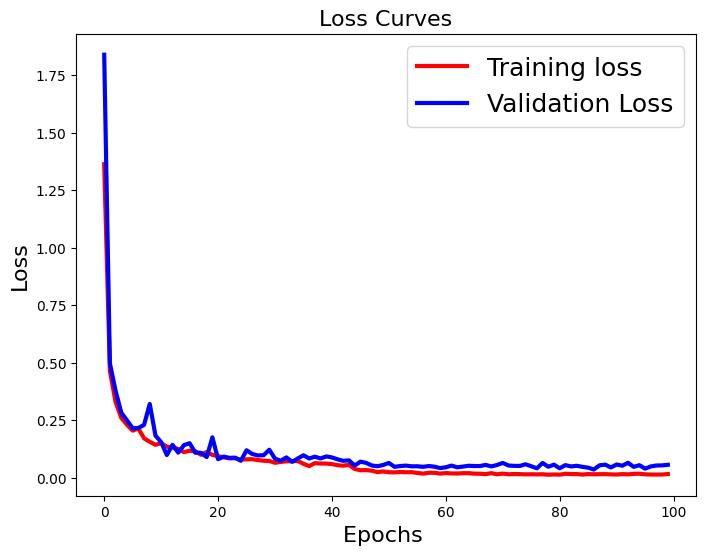

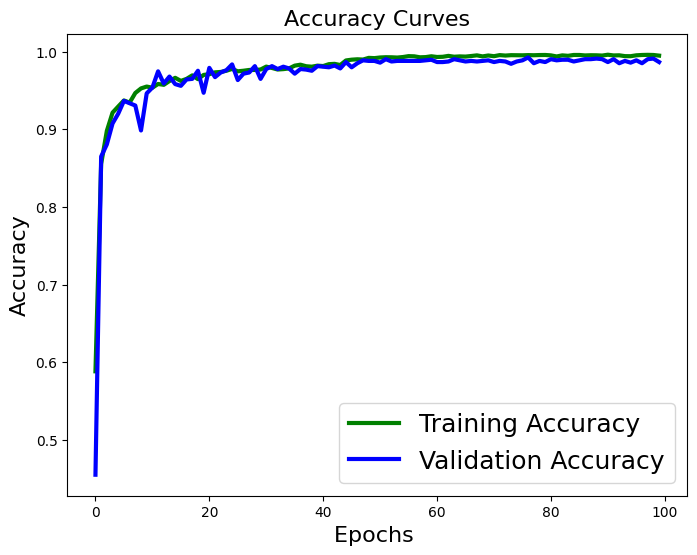

In [ ]:
plot_loss_accuracy(history)

#Load best model and Evaluation

In [ ]:
saved_model = create_model(optimizer='Adam', activation='relu')
saved_model.load_weights(model_weights_file_path)

In [ ]:
saved_model.evaluate(generators.train_generator)

605/605 [==============================] - 15s 24ms/step - loss: 0.0082 - accuracy: 0.9976


[0.00822821632027626, 0.9976025223731995]

In [ ]:
saved_model.evaluate(generators.test_generator)

168/168 [==============================] - 2s 11ms/step - loss: 0.0713 - accuracy: 0.9863


[0.07133327424526215, 0.9863095283508301]

In [ ]:
#END for NOW
# Feed Back:
# get the best accuracy  about 99 on train and 98.6 on test
# table below for comparsion

In [ ]:
from tabulate import tabulate

# Define the data in a structured format
table_data = [
    ["El-Sawy A, Loey M, El-Bakry H [1]", 2017, "CNN", "94.9%"],
    ["Younis KS [2]", 2017, "CNN with regularization parameters", "97.4%"],
    ["Najadat HM, Alshboul AA, Alabed AF [3]", 2019, "Modified CNN architecture", "97.2%"],
    ["Elmiad AK [4]", 2019, "Proposed CNN architecture", "98.0%"],
    ["Altwaijry N, Al-Turaiki I [5]", 2020, "Deep neural network", "97.0%"],
    ["Alyahya H, Ismail MMB, Al-Salman A [6]", 2020, "ResNet-18 model", "98.30%"],
    ["Almuhaya B, Saha B [7]", 2023, "DenseNet161", "94.51%"],
    ["Our Work", "-", "Deep CNN", "98.63%"]
]

# Define headers for the table
headers = ["Author(s)", "Year", "Method", "Best Accuracy"]

# Print the table using tabulate
print(tabulate(table_data, headers=headers, tablefmt="pretty"))


+----------------------------------------+------+------------------------------------+---------------+
|               Author(s)                | Year |               Method               | Best Accuracy |
+----------------------------------------+------+------------------------------------+---------------+
|   El-Sawy A, Loey M, El-Bakry H [1]    | 2017 |                CNN                 |     94.9%     |
|             Younis KS [2]              | 2017 | CNN with regularization parameters |     97.4%     |
| Najadat HM, Alshboul AA, Alabed AF [3] | 2019 |     Modified CNN architecture      |     97.2%     |
|             Elmiad AK [4]              | 2019 |     Proposed CNN architecture      |     98.0%     |
|     Altwaijry N, Al-Turaiki I [5]      | 2020 |        Deep neural network         |     97.0%     |
| Alyahya H, Ismail MMB, Al-Salman A [6] | 2020 |          ResNet-18 model           |    98.30%     |
|         Almuhaya B, Saha B [7]         | 2023 |            DenseNet161 

In [ ]:

# Refernces:
# [1]	A. El-Sawy, M. Loey, and E. Hazem, "Arabic handwritten characters recognition using convolutional neural network," WSEAS Trans Comput Res, vol. 5, pp. 11–19, 2017.
# [2]	K. S. Younis, "Arabic handwritten character recognition based on deep convolutional neural networks," Jordanian Journal of Computers and Information Technology, vol. 3, no. 3, pp. 186-200, 2017.
# [3]	H. M. Najadat, A. A. Alshboul, and A. F. Alabed, "Arabic handwritten characters recognition using convolutional neural network," in international conference on information and communication systems 2019, IEEE, pp. 147-51, 2019.
# [4]	A. K. Elmiad, "Arab handwriting character recognition using deep learning," in international conference europe middle east & north africa information systems and technologies to support learning 2019, Springer, Cham, pp. 410-5, 2019.
# [5]	N. Altwaijry and I. Al-Turaiki, "Arabic handwriting recognition system using convolutional neural network," Neural Computing and Applications, 2020:1-3.
# [6]	H. Alyahya, M. M. B. Ismail, and A. Al-Salman, "Deep ensemble neural networks for recognizing isolated Arabic handwritten characters," ACCENTS Transactions on Image Processing and Computer Vision, vol. 6, no. 21, p. 68, 2020.
# [7]	B. Almuhaya and B. Saha, "A Comparative Analysis of Two Arabic Handwritten Datasets Using Pretrained Deep Learning Models," Kilby, vol. 100, no. 7th, 2023.
